In [61]:
import pandas as pd

In [62]:
# ex 1

titanic_df = pd.read_csv('../../data/Titanic/train.csv')

print(titanic_df.shape)
titanic_df.head(1)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [63]:
duplicated = titanic_df.duplicated(keep=False)
print(titanic_df.shape)

(891, 12)


In [64]:
# ex 2
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
titanic_cleaned = titanic_df.copy()

In [66]:
from sklearn.impute import SimpleImputer

titanic_cleaned['Age'] = titanic_cleaned['Age'].fillna(titanic_cleaned['Age'].median())
titanic_cleaned['Embarked'] = titanic_cleaned['Embarked'].fillna(titanic_cleaned['Embarked'].mode()[0])
cabin_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
titanic_cleaned['Cabin'] = cabin_imputer.fit_transform(titanic_cleaned[['Cabin']]).ravel()

In [67]:
titanic_cleaned.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [68]:
# ex 3

titanic_cleaned['FamilySize'] = titanic_cleaned['SibSp'] + titanic_cleaned['Parch'] + 1
titanic_cleaned['Title'] = titanic_cleaned['Name'].str.extract(r',\s*([^\.]+)\.')

In [69]:
titanic_cleaned.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,Unknown,S,2,Mr


In [70]:
from sklearn.preprocessing import LabelEncoder

title_encoder = LabelEncoder()
titanic_cleaned['Title_encoded'] = title_encoder.fit_transform(titanic_cleaned['Title'])

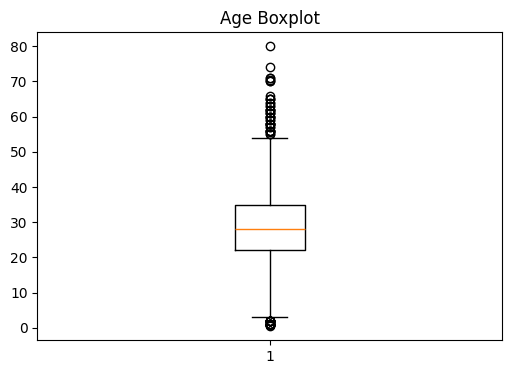

In [71]:
# ex 4

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(titanic_cleaned['Age'].dropna())
plt.title('Age Boxplot')
plt.show()

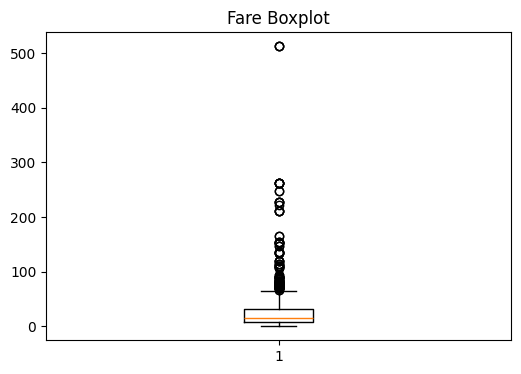

In [72]:
plt.figure(figsize=(6,4))
plt.boxplot(titanic_cleaned['Fare'].dropna())
plt.title('Fare Boxplot')
plt.show()

In [73]:
Q1 = titanic_cleaned[['Age', 'Fare']].quantile(0.25)
Q3 = titanic_cleaned[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((titanic_cleaned[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) |
                (titanic_cleaned[['Age', 'Fare']] > (Q3 + 1.5 * IQR)))

outliers_iqr.sum()

Age      66
Fare    116
dtype: int64

In [74]:
titanic_capped = titanic_cleaned.copy()

In [75]:
fare_cap = titanic_capped['Fare'].quantile(0.98)
age_cap = titanic_capped['Age'].quantile(0.98)

In [76]:
titanic_capped['Fare'] = titanic_capped['Fare'].clip(upper=fare_cap)
titanic_capped['Age'] = titanic_capped['Age'].clip(upper=age_cap)

In [77]:
print(titanic_cleaned[['Age', 'Fare']].describe())

              Age        Fare
count  891.000000  891.000000
mean    29.361582   32.204208
std     13.019697   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200


In [78]:
print(titanic_capped[['Age', 'Fare']].describe())

              Age        Fare
count  891.000000  891.000000
mean    29.258889   30.678483
std     12.720003   39.904946
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     62.000000  211.337500


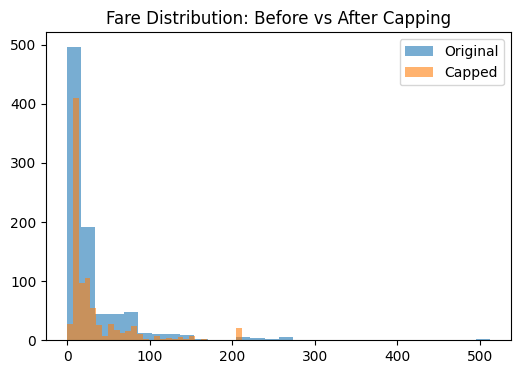

In [79]:
plt.figure(figsize=(6,4))
plt.hist(titanic_cleaned['Fare'], bins=30, alpha=0.6, label='Original')
plt.hist(titanic_capped['Fare'], bins=30, alpha=0.6, label='Capped')
plt.title("Fare Distribution: Before vs After Capping")
plt.legend()
plt.show()

In [80]:
# ex 5

from sklearn.preprocessing import StandardScaler, MinMaxScaler

titanic_scaled = titanic_capped.copy()

std_scaler = StandardScaler()
titanic_scaled['Age_scaled'] = std_scaler.fit_transform(titanic_scaled[['Age']])

mm_scaler = MinMaxScaler()
titanic_scaled['Fare_scaled'] = mm_scaler.fit_transform(titanic_scaled[['Fare']])
titanic_scaled['FamilySize_scaled'] = mm_scaler.fit_transform(titanic_scaled[['FamilySize']])

In [81]:
print(titanic_scaled.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.258889    0.523008   
std     257.353842    0.486592    0.836071   12.720003    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   62.000000    8.000000   

            Parch        Fare  FamilySize  Title_encoded    Age_scaled  \
count  891.000000  891.000000  891.000000     891.000000  8.910000e+02   
mean     0.381594   30.678483    1.904602      10.241302  1.674680e-16   
std      0.806057   39.904946    1.613459       1.830798  1.000562e+00   
min      0.000000    0.000000    1.000000       0.000000 -2.268481e+00   

In [82]:
# ex 6

titanic_encoded = titanic_capped.copy()

categorical_cols = ['Sex', 'Embarked', 'Title']

titanic_encoded = pd.get_dummies(titanic_encoded, columns=categorical_cols, drop_first=True)

In [83]:
le = LabelEncoder()
titanic_encoded['Pclass_encoded'] = le.fit_transform(titanic_encoded['Pclass'])

In [84]:
print(titanic_encoded.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.258889    0.523008   
std     257.353842    0.486592    0.836071   12.720003    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   62.000000    8.000000   

            Parch        Fare  FamilySize  Title_encoded  Pclass_encoded  
count  891.000000  891.000000  891.000000     891.000000      891.000000  
mean     0.381594   30.678483    1.904602      10.241302        1.308642  
std      0.806057   39.904946    1.613459       1.830798        0.836071  
min      0.000000    0.000000    1.000000       0.000000        0.000

In [85]:
# ex 7

bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']

titanic_encoded['AgeGroup'] = pd.cut(titanic_encoded['Age'], bins=bins, labels=labels)

In [86]:
titanic_encoded = pd.get_dummies(titanic_encoded, columns=['AgeGroup'], drop_first=True)


In [91]:
titanic_encoded.head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Pclass_encoded,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,Unknown,...,True,False,False,False,False,False,2,False,True,False


In [90]:
titanic_encoded.to_json('result.json', orient='records')